# Assignment 2 - Zach Aaberg

In [1]:
# Loading libraries and settings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ensemble_params = {}
test_size = 200

### Q1) Load the dataset into a pandas dataframe and display the first 5 lines of the dataset along with the column headings.

In [2]:
dataset = pd.read_csv(r'data.csv')
print(dataset.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


### Q2) Display the number of instances for each class. That is, you should write code to find out how many instances you have for class 1, class 2, class 3, and class 4.

In [3]:
# Isolating the explanatory and target variables
X = dataset.iloc[:,:11].values
y = dataset['custcat'].values
y_count = dataset['custcat'].value_counts()

print("Class","Count")
print(y_count)

Class Count
3    281
1    266
4    236
2    217
Name: custcat, dtype: int64


### Q3) Create histograms of columns age and income to visually explore their distributions.

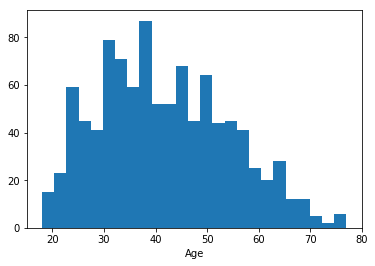

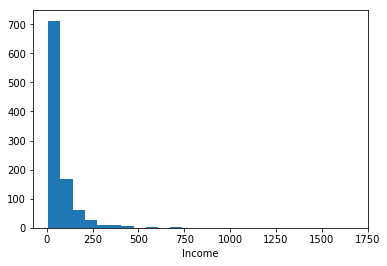

In [4]:
plt.hist(dataset['age'], bins=25)
plt.xlabel('Age')
plt.show()

plt.hist(dataset['income'], bins=25)
plt.xlabel('Income')
plt.show()


### Q5) Split the dataset into training (80%) and testing set (20%).

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Q4) Perform normalization of the data using standardization.

In [6]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Q6) Model 1: Fit a logistic regression model. What is the testing misclassification rate you get?

In [7]:
def LogReg(x_training, x_testing, y_training, y_testing):
    # Loading model, fitting to our data, and running prediction
    classifierObj_lr = LogisticRegression(random_state=0)
    classifierObj_lr.fit(x_training, y_training)
    y_pred = classifierObj_lr.predict(x_testing)
    
    # Generating the accuracy score of our model. Returns rate of positively classified predictions. 
    accuracy_lr = accuracy_score(y_testing, y_pred)
    
    return(accuracy_lr,classifierObj_lr)

log_reg = LogReg(X_train, X_test, y_train, y_test)

print("Positive classification rate:",log_reg[0])

Positive classification rate: 0.415


### Q7) Model 2: We will now fit k-NN. However for k-NN you need to specify the value for k. In order to figure that out, run k-NN with different values of k and compute the testing misclassification rate. Plot a chart with k on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of k?

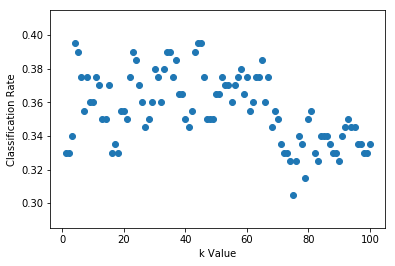


k_value   Classification_Rate
4        0.395


In [8]:
def kNN(x_training, x_testing, y_training, y_testing, attempts):
    k_vals = {}
    for k in range(attempts):
        # range function begins at 0. 
        k = k + 1
        
        # Loading model, fitting to our data, and running prediction
        classifierObj = KNeighborsClassifier(n_neighbors=k,p=2,metric='minkowski')
        classifierObj.fit(x_training,y_training)
        y_pred = classifierObj.predict(x_testing)

        # Generating the accuracy score of our model. Returns rate of positively classified predictions. 
        k_vals[k] = accuracy_score(y_testing,y_pred)
    
    # Selects the best classification rate out of dictionary.
    max_key = max(k_vals,key=k_vals.get)
    
    # Loading model of lowest error and fitting it for our final ensemble.
    classifierObj_kNN = KNeighborsClassifier(n_neighbors=max_key,p=2,metric='minkowski')
    classifierObj_kNN.fit(x_training,y_training)
    
    # Builds scatterplot of k and testing error.
    plt.scatter(k_vals.keys(), k_vals.values())
    plt.xlabel("k Value")
    plt.ylabel("Classification Rate")
    plt.show()
    
    return(max_key, k_vals.get(max_key),classifierObj_kNN)

kNN_results = kNN(X_train, X_test, y_train, y_test, 100)

print('''
k_value   Classification_Rate
{}        {}'''.format(kNN_results[0],kNN_results[1]))

### Q8) Model 3: Fit SVM model with different kernels. Which kernel gives the least testing error?

In [9]:
def svm_linear(x_training, x_testing, y_training, y_testing):
    # Loading model, fitting to our data, and running prediction    
    classifierObj_svm=SVC(kernel='linear')
    classifierObj_svm.fit(x_training, y_training)
    y_pred = classifierObj_svm.predict(x_testing)
    
    # Generating the accuracy score of our model. Returns rate of positively classified predictions. 
    accuracy_svm = accuracy_score(y_testing, y_pred, normalize=False)  
    return(accuracy_svm, classifierObj_svm)

def svm_gaussian(x_training, x_testing, y_training, y_testing):
    # Loading model, fitting to our data, and running prediction  
    classifierObj_svm=SVC()
    classifierObj_svm.fit(x_training, y_training)
    y_pred = classifierObj_svm.predict(x_testing)
    
    # Generating the accuracy score of our model. Returns rate of positively classified predictions. 
    accuracy_svm = accuracy_score(y_testing, y_pred, normalize=False)  
    return(accuracy_svm, classifierObj_svm)

def svm_poly(x_training, x_testing, y_training, y_testing):
    # Loading model, fitting to our data, and running prediction
    classifierObj_svm=SVC(kernel='poly',degree=3)
    classifierObj_svm.fit(x_training, y_training)
    y_pred = classifierObj_svm.predict(x_testing)
    
    # Generating the accuracy score of our model. Returns rate of positively classified predictions. 
    accuracy_svm = accuracy_score(y_testing, y_pred, normalize=False)  
    return(accuracy_svm, classifierObj_svm)

def svm_sigmoid(x_training, x_testing, y_training, y_testing):
    # Loading model, fitting to our data, and running prediction
    classifierObj_svm=SVC(kernel='sigmoid')
    classifierObj_svm.fit(x_training, y_training)
    y_pred = classifierObj_svm.predict(x_testing)
    
    # Generating the accuracy score of our model. Returns rate of positively classified predictions. 
    accuracy_svm = accuracy_score(y_testing, y_pred, normalize=False)  
    return(accuracy_svm, classifierObj_svm)

# Holds accuracy scores from svm models
score_dict = {}

# Running each kernel and then the adding results to dictionary
linear = svm_linear(X_train, X_test, y_train, y_test) 
gaussian = svm_gaussian(X_train, X_test, y_train, y_test) 
poly = svm_poly(X_train, X_test, y_train, y_test) 
sigmoid = svm_sigmoid(X_train, X_test, y_train, y_test)    
score_dict["Linear"] = linear[0]
score_dict["Gaussian"] =  gaussian[0]
score_dict["Polynomial"] =  poly[0]
score_dict["Sigmoid"] = sigmoid[0]

# Displays results
print('''
     Positive_Count  Accuracy_Rate
Linear:     {}       {}
Gaussian:   {}       {}
Polynomial: {}       {}
Sigmoid:    {}       {}
'''.format(score_dict.get('Linear'),score_dict.get('Linear')/test_size, 
           score_dict.get('Gaussian'), score_dict.get('Gaussian')/test_size,
           score_dict.get('Polynomial'),score_dict.get('Polynomial')/test_size,
           score_dict.get('Sigmoid'),score_dict.get('Sigmoid')/test_size))

# Get the best model and save it as a parameter for our ensemble.
max_score = max(score_dict,key=score_dict.get)
ensemble_params["svm_type"] = max_score

# Determines best kernel results
print('''\n{} kernel appears to provide the highest accuracy/lowest testing error, on this sample, with {} matches.
'''.format(max_score, score_dict.get(max_score)))


     Positive_Count  Accuracy_Rate
Linear:     82       0.41
Gaussian:   75       0.375
Polynomial: 82       0.41
Sigmoid:    73       0.365


Linear kernel appears to provide the highest accuracy/lowest testing error, on this sample, with 82 matches.



### Q9) Model 4: Fit Naïve Bayes model. What is the testing error you get?

In [10]:
def naiveBayes(x_training, x_testing, y_training, y_testing):
    
    # Loading model, fitting to our data, and running prediction
    classifierObj_nb = GaussianNB()
    classifierObj_nb.fit(x_training, y_training)
    y_pred = classifierObj_nb.predict(x_testing)
    
    # Generating the accuracy score of our model. Returns rate of positively classified predictions.    
    accuracy_naiveBayes = accuracy_score(y_testing, y_pred, normalize=False)  
    
    return(accuracy_naiveBayes, classifierObj_nb)

naive_score = naiveBayes(X_train, X_test, y_train, y_test) 

print('''
       Positive_Count   Accuracy_Rate
Naive Bayes:   {}       {}'''.format(naive_score[0], naive_score[0]/test_size))


       Positive_Count   Accuracy_Rate
Naive Bayes:   72       0.36


### Q10) Model 5: Fit Random Forest model. For Random Forest, you need to specify the number of trees (n_estimators). In order to figure that out, run Random Forest with different values of n_estimators and compute the testing misclassification rate. Plot a chart with n_estimators on X-axis and testing error on the Y-axis. What is the lowest value of testing error and corresponding value of n_estimators?

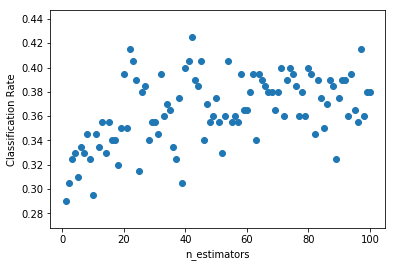


               n_estimator  Accuracy_Rate
Random Forest: 42            0.425


In [11]:
def randomForest(x_training, x_testing, y_training, y_testing, attempts):
    n_scores = {}
    for n in range(attempts):
        # range function begins at 0. 
        n = n + 1
        
        # Loading model, fitting to our data, and running prediction
        classifierObj = RandomForestClassifier(n_estimators = n, criterion='entropy')
        classifierObj.fit(x_training, y_training)
        y_pred = classifierObj.predict(x_testing)
        
        
        accuracy_randomForest = accuracy_score(y_testing, y_pred) 
        
        # Add scores to dictionary to determine best n_estimator parameter
        n_scores[n] = accuracy_randomForest
        
    # Selects the best classification rate out of dictionary.
    max_n_score = max(n_scores,key=n_scores.get)
    
    # Loading model of lowest error and fitting it for our final ensemble.
    classifierObj_rf = RandomForestClassifier(n_estimators = max_n_score, criterion='entropy')
    classifierObj_rf.fit(x_training, y_training)
    
    # Builds scatterplot of k and testing error.
    plt.scatter(n_scores.keys(), n_scores.values())
    plt.xlabel("n_estimators")
    plt.ylabel("Classification Rate")
    plt.show()
    
    return(max_n_score,n_scores.get(max_n_score),classifierObj_rf)
    

rf_score = randomForest(X_train, X_test, y_train, y_test, 100) 
ensemble_params["n_randomForest"] = rf_score[0]

print('''
               n_estimator  Accuracy_Rate
Random Forest: {}            {}'''.format(rf_score[0],rf_score[1]))

### Q11) Predicting with Ensemble: Now that you have built 5 models. Loop over the testing set. For every test instance, have each of the models predict the class label. Eventual class predicted will be based on a majority vote of the 5 models. What is the testing misclassification rate you get with the ensemble model?

In [12]:
def ensemble(x_training, x_testing, y_training, y_testing):
    # Logistic Regression predictions
    y_pred_lr = naive_score[1].predict(x_testing)
    
    # kNN predictions
    y_pred_kNN = kNN_results[2].predict(x_testing)
    
    # Logic to handle the best fitting kernel and run SVM predictions
    if ensemble_params.get('svm_type') == 'Linear':
        y_pred_svm = linear[1].predict(x_testing)
    elif ensemble_params.get('svm_type') == 'Gaussian':
        y_pred_svm = gaussian[1].predict(x_testing)
    elif ensemble_params.get('svm_type') == 'Polynomial':
        y_pred_svm = poly[1].predict(x_testing)
    elif ensemble_params.get('svm_type') == 'Sigmoid':
        y_pred_svm = sigmoid[1].predict(x_testing)
    else:
        print("Error in SVM portion of ensemble.")
    
    # Naive Bayes predictions
    y_pred_nb = naive_score[1].predict(x_testing)
    
    # Random Forest predictions
    y_pred_rf = rf_score[2].predict(x_testing)
    
    #add all of the predictions to a dataframe and take the mode for each row.
    df = pd.DataFrame({"logR":y_pred_lr,"knn":y_pred_kNN,"svm":y_pred_svm,"nb":y_pred_nb,"rf":y_pred_rf})
    ensemble_prediction = df.mode(axis=1)[0]
  
    return(accuracy_score(ensemble_prediction.values,y_testing))

ensemble_classRate = ensemble(X_train, X_test, y_train, y_test)
print("Testing set's classification rate, while using an ensemble, is {}".format(ensemble_classRate))
    

Testing set's classification rate, while using an ensemble, is 0.41
